<a href="https://colab.research.google.com/github/Micheal-Oluwafisayo/Danny-Diner/blob/main/Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Load the datasets

train_df = pd.read_csv('/content/drive/MyDrive/Case Study/Copy of train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Case Study/Copy of test.csv')

In [8]:
# Display the first few rows of the training dataset
train_df.head()

,title,country,genres,language,writer_count,title_adaption,censor_rating,release_date,runtime,dvd_release_date,...,likes,overall_views,dislikes,ratings_imdb,ratings_tomatoes,ratings_metacritic,special_award,awards_win,awards_nomination,revenue_category
0,Pooh's Heffalump Movie,USA,"Animation, Comedy, Family, Fantasy, Musical, M...",English,3.0,True,G,11-Feb-05,68 min,24-May-05,...,NaN,NaN,NaN,6.4/10,80%,64/100,0,0,1,High
1,Yeh Jawaani Hai Deewani,India,"Comedy, Drama, Musical, Romance","Hindi, English, French",2.0,True,Not Rated,31-May-13,160 min,15-Jul-13,...,124.0,127528.0,12.0,7.1/10,67%,0,0,22,92,Low
2,Tae Guk Gi: The Brotherhood of War,South Korea,"Action, Drama, War",Korean,4.0,False,R,24-Sep-04,140 min,15-Feb-05,...,614.0,351123.0,18.0,8.1/10,80%,64/100,0,12,7,Low
3,"Book of Eli, The",USA,"Action, Adventure, Drama, Thriller",English,1.0,False,R,15-Jan-10,118 min,15-Jun-10,...,NaN,NaN,NaN,6.9/10,47%,53/100,0,3,16,High
4,Blind Dating,USA,"Comedy, Romance",English,1.0,False,PG-13,26-Apr-07,95 min,05-Feb-08,...,693.0,970306.0,36.0,6.1/10,25%,0,0,0,0,Low


In [9]:
# Check for missing values in the dataset
missing_values = train_df.isnull().sum()

# Check data types and basic statistics
data_info = train_df.info()
data_description = train_df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               2398 non-null   object 
 1   country             2400 non-null   object 
 2   genres              2400 non-null   object 
 3   language            2395 non-null   object 
 4   writer_count        2306 non-null   float64
 5   title_adaption      2400 non-null   bool   
 6   censor_rating       2362 non-null   object 
 7   release_date        2396 non-null   object 
 8   runtime             2400 non-null   object 
 9   dvd_release_date    2331 non-null   object 
 10  users_votes         2400 non-null   object 
 11  comments            1974 non-null   float64
 12  likes               1956 non-null   float64
 13  overall_views       2083 non-null   float64
 14  dislikes            1956 non-null   float64
 15  ratings_imdb        2400 non-null   object 
 16  rating

In [ ]:
missing_values, data_info, data_description

(title                   2
 country                 0
 genres                  0
 language                5
 writer_count           94
 title_adaption          0
 censor_rating          38
 release_date            4
 runtime                 0
 dvd_release_date       69
 users_votes             0
 comments              426
 likes                 444
 overall_views         317
 dislikes              444
 ratings_imdb            0
 ratings_tomatoes        0
 ratings_metacritic      0
 special_award           0
 awards_win              0
 awards_nomination       0
 revenue_category        0
 dtype: int64,
 None,
                   title country genres language  writer_count title_adaption  \
 count              2398    2400   2400     2395   2306.000000           2400   
 unique             2387     485    586      474           NaN              2   
 top     Last Kiss, The      USA  Drama  English           NaN          False   
 freq                  2    1185    147     1313           N

In [16]:
print(train_df["runtime"]. unique())

[ 68. 160. 140. 118.  95.  88.  91.  93. 109. 113.  85. 143. 104.  94.
 119. 112. 107.  97. 101. 130.  86. 116. 105.  87. 100. 106.  90.  96.
 125. 108. 148.  92.  99. 181.  89. 102. 127. 135. 110. 121. 120. 145.
 138. 133. 115. 122.  38. 117. 124. 137. 114. 103. 186. 146.  83.  82.
 134. 129. 154.  41. 151.  80. 272. 111. 158.  84.  98.  40. 192. 132.
 128. 123. 182. 156.  76.  78.  75. 139. 153. 162. 142. 131. 126. 141.
 152. 175. 180. 157. 147. 566.  81. 171. 136.  77. 150. 170. 183.  50.
 165. 155. 149. 168. 167.  72.  79. 144. 163. 166. 178.  73.  65.  74.
 172. 187. 161.  59.]


In [18]:
# Convert `runtime` to numeric by removing " min" and converting to integer
train_df["runtime"] = train_df["runtime"].astype(str).str.replace(" min", "").astype(float)

# Convert `ratings_imdb` to float by removing "/10"
train_df["ratings_imdb"] = train_df["ratings_imdb"].astype(str).str.replace("/10", "").astype(float)

In [20]:
# Convert `ratings_tomatoes` to percentage by removing "%" and converting to float
train_df["ratings_tomatoes"] = train_df["ratings_tomatoes"].astype(str).str.replace("%", "").astype(float)

# Convert `ratings_metacritic` to numeric by removing "/100" and converting to numeric
train_df["ratings_metacritic"] = train_df["ratings_metacritic"].astype(str).str.replace("/100", "")
train_df["ratings_metacritic"] = pd.to_numeric(train_df["ratings_metacritic"], errors="coerce")

In [21]:
# Convert release_date to datetime format and extract the year
train_df["release_date"] = pd.to_datetime(train_df["release_date"], errors='coerce')
train_df["release_year"] = train_df["release_date"].dt.year

<ipython-input-21-5efe6349bd80>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_df["release_date"] = pd.to_datetime(train_df["release_date"], errors='coerce')


In [22]:
# Fill missing numerical values with median
num_cols = ["writer_count", "comments", "likes", "overall_views", "dislikes", "ratings_metacritic", "release_year"]
for col in num_cols:
    train_df[col] = train_df[col].fillna(train_df[col].median())

In [23]:
# Fill missing categorical values with the most common value
cat_cols = ["censor_rating"]
for col in cat_cols:
    train_df[col] = train_df[col].fillna(train_df[col].mode()[0])

In [24]:
# Drop columns that are not useful for prediction
train_df = train_df.drop(columns=["title", "release_date", "dvd_release_date", "users_votes"])

In [25]:
# Display the cleaned dataset
train_df.head()

,country,genres,language,writer_count,title_adaption,censor_rating,runtime,comments,likes,overall_views,dislikes,ratings_imdb,ratings_tomatoes,ratings_metacritic,special_award,awards_win,awards_nomination,revenue_category,release_year
0,USA,"Animation, Comedy, Family, Fantasy, Musical, M...",English,3.0,True,G,68.0,57.0,425.0,281652.0,30.0,6.4,80.0,64,0,0,1,High,2005.0
1,India,"Comedy, Drama, Musical, Romance","Hindi, English, French",2.0,True,Not Rated,160.0,9.0,124.0,127528.0,12.0,7.1,67.0,0,0,22,92,Low,2013.0
2,South Korea,"Action, Drama, War",Korean,4.0,False,R,140.0,268.0,614.0,351123.0,18.0,8.1,80.0,64,0,12,7,Low,2004.0
3,USA,"Action, Adventure, Drama, Thriller",English,1.0,False,R,118.0,57.0,425.0,281652.0,30.0,6.9,47.0,53,0,3,16,High,2010.0
4,USA,"Comedy, Romance",English,1.0,False,PG-13,95.0,116.0,693.0,970306.0,36.0,6.1,25.0,0,0,0,0,Low,2007.0


## **Exploratory Data Analysis**

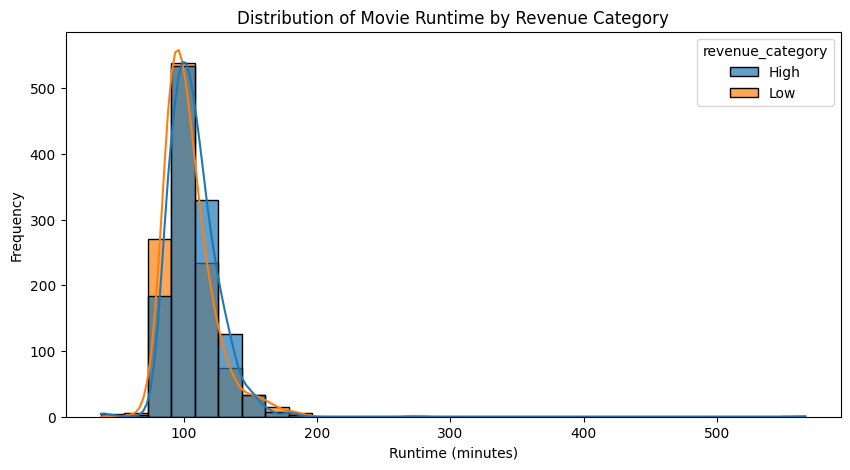

In [26]:
# Plot distribution of runtime for high and low revenue categories
plt.figure(figsize=(10, 5))
sns.histplot(data=train_df, x="runtime", hue="revenue_category", kde=True, bins=30, alpha=0.7)
plt.title("Distribution of Movie Runtime by Revenue Category")
plt.xlabel("Runtime (minutes)")
plt.ylabel("Frequency")
plt.show()

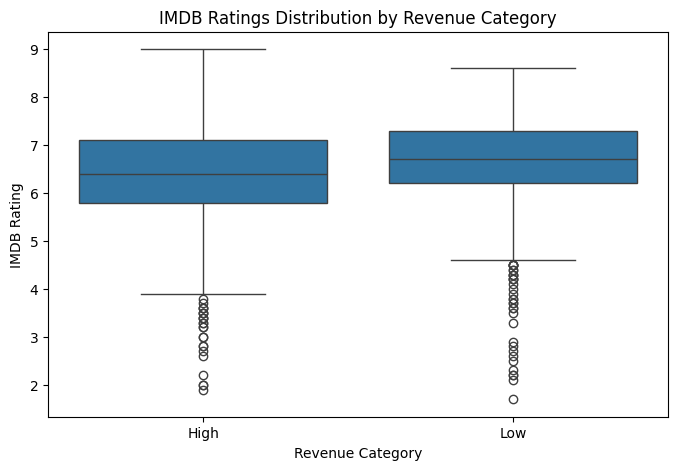

In [27]:
# Boxplot for IMDB ratings by revenue category
plt.figure(figsize=(8, 5))
sns.boxplot(data=train_df, x="revenue_category", y="ratings_imdb")
plt.title("IMDB Ratings Distribution by Revenue Category")
plt.xlabel("Revenue Category")
plt.ylabel("IMDB Rating")
plt.show()

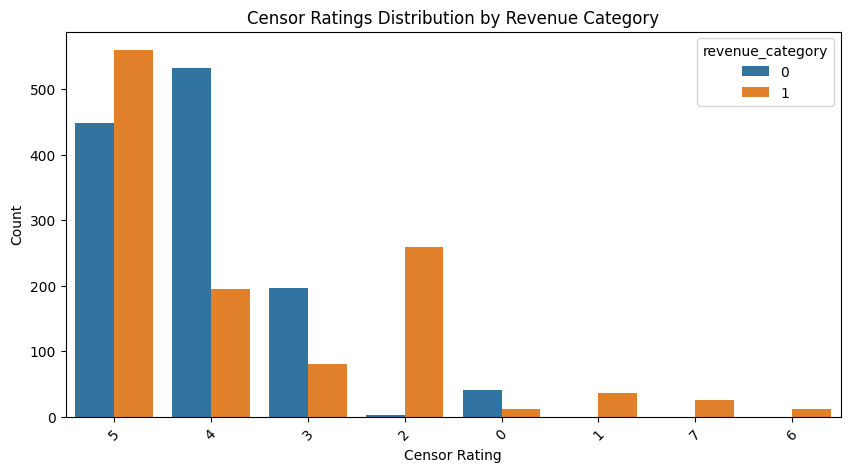

In [31]:
# Countplot for censor ratings by revenue category
plt.figure(figsize=(10, 5))
sns.countplot(data=train_df, x="censor_rating", hue="revenue_category", order=train_df["censor_rating"].value_counts().index)
plt.title("Censor Ratings Distribution by Revenue Category")
plt.xticks(rotation=45)
plt.xlabel("Censor Rating")
plt.ylabel("Count")
plt.show()

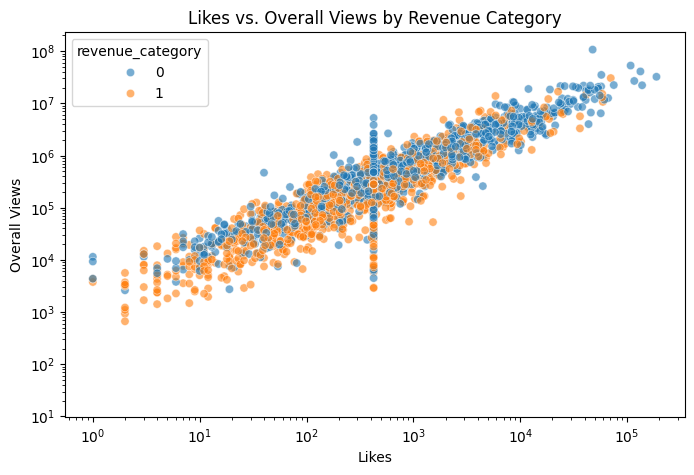

In [30]:
# Scatterplot of likes vs overall views by revenue category
plt.figure(figsize=(8, 5))
sns.scatterplot(data=train_df, x="likes", y="overall_views", hue="revenue_category", alpha=0.6)
plt.title("Likes vs. Overall Views by Revenue Category")
plt.xlabel("Likes")
plt.ylabel("Overall Views")
plt.xscale("log")
plt.yscale("log")
plt.show()

## **Data Preprocessing**

In [29]:
# Encode categorical features
label_encoders = {}
for col in ["country", "genres", "language", "censor_rating", "revenue_category"]:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    label_encoders[col] = le

In [32]:
# Define features and target variable
X = train_df.drop(columns=["revenue_category"])
y = train_df["revenue_category"]

In [33]:
# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)


In [34]:
# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [35]:
# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [36]:
# Predictions
y_pred = rf_model.predict(X_val_scaled)

In [38]:
# Evaluate model performance
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred, average="weighted")
classification_rep = classification_report(y_val, y_pred)

In [39]:
print(" Model Accuracy: ", accuracy, '\n', "F1-score: ", f1, '\n', "Model Classification report:", '\n', classification_rep)

 Model Accuracy:  0.8166666666666667 
 F1-score:  0.8164210697240152 
 Model Classification report: 
               precision    recall  f1-score   support

           0       0.80      0.85      0.82       244
           1       0.83      0.78      0.81       236

    accuracy                           0.82       480
   macro avg       0.82      0.82      0.82       480
weighted avg       0.82      0.82      0.82       480



#### **Model Performance Explanation**
Accuracy: 81.67%,

F1-score: 81.64%

The model demonstrates strong performance in distinguishing between "High" and "Low" revenue categories.
The precision and recall scores for both categories are balanced, indicating that the model does not overly favor one class.

## **Prediction for Test File**

In [ ]:
# Keep the title column separately for test submission
test_titles = test_df["title"]

In [40]:
# Apply the same preprocessing steps as the training set

# Convert `runtime` to numeric
test_df["runtime"] = test_df["runtime"].str.replace(" min", "").astype(float)

# Convert `ratings_imdb` to float by removing "/10"
test_df["ratings_imdb"] = test_df["ratings_imdb"].str.replace("/10", "").astype(float)

# Convert `ratings_tomatoes` to percentage by removing "%" and converting to float
test_df["ratings_tomatoes"] = test_df["ratings_tomatoes"].str.replace("%", "").astype(float)

# Convert `ratings_metacritic` to numeric by removing "/100" and handling empty values
test_df["ratings_metacritic"] = test_df["ratings_metacritic"].str.replace("/100", "", regex=True)
test_df["ratings_metacritic"] = pd.to_numeric(test_df["ratings_metacritic"], errors="coerce")

In [41]:
# Convert release_date to datetime and extract the year
test_df["release_date"] = pd.to_datetime(test_df["release_date"], errors='coerce')
test_df["release_year"] = test_df["release_date"].dt.year

<ipython-input-41-a58ffac7998d>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_df["release_date"] = pd.to_datetime(test_df["release_date"], errors='coerce')


In [42]:
# Fill missing numerical values with median from training set
for col in num_cols:
    test_df[col] = test_df[col].fillna(train_df[col].median())

In [43]:
# Fill missing categorical values with mode from training set
for col in cat_cols:
    test_df[col] = test_df[col].fillna(train_df[col].mode()[0])

In [44]:
# Encode categorical features using training label encoders
for col in ["country", "genres", "language", "censor_rating"]:
    test_df[col] = test_df[col].map(lambda x: label_encoders[col].transform([x])[0] if x in label_encoders[col].classes_ else -1)

In [45]:
# Fill missing release_year values with the median year
test_df["release_year"] = test_df["release_year"].fillna(train_df["release_year"].median())

In [46]:
# Drop unnecessary columns
test_df = test_df.drop(columns=["title", "release_date", "dvd_release_date", "users_votes"])

In [47]:
# Standardize numerical features using the training scaler
X_test_scaled = scaler.transform(test_df)

In [48]:
# Make predictions
test_predictions = rf_model.predict(X_test_scaled)

In [ ]:
# Convert numerical predictions back to categorical values using inverse transform
test_predictions_labels = label_encoders["revenue_category"].inverse_transform(test_predictions)

In [ ]:
# Create submission dataframe
submission_df = pd.DataFrame({"title": test_titles, "revenue_category": test_predictions_labels})

# Save to CSV
submission_file_path = "/content/drive/MyDrive/Fisayo/submissions.csv"
submission_df.to_csv(submission_file_path, index=False)